In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [68]:
# German Credit
probs_file = '/home/dhasade/audits/ml-audits/data/german_credit/all_nks.pkl'
ts = 1000

In [86]:
# propublica
probs_file = '/home/dhasade/audits/ml-audits/data/propublica/all_nks.pkl'
ts = 6172

In [105]:
# folktables
probs_file = '/home/dhasade/audits/ml-audits/data/folktables/all_nks.pkl'
ts = 5916565

In [100]:
with open(probs_file, 'rb') as f:
    ns = pickle.load(f)

In [101]:
n = 5

In [102]:
def get_max_value(nested_dict):
    max_value = 0
    for _, v in nested_dict.items():
        if isinstance(v, dict):
            v = get_max_value(v)
        if v > max_value:
            max_value = v
    return max_value

In [103]:
def get_sum_value(nested_dict):
    sum_value = 0
    for _, v in nested_dict.items():
        if isinstance(v, dict):
            v = get_sum_value(v)
        sum_value += v
    return sum_value

In [106]:
max_ns = [[] for _ in range(1, n+1)]

for k in range(1, n+1):
    possible_collaborators = list(range(n))
    agent_combinations_list = list(combinations(possible_collaborators, k))

    for agent_combination in agent_combinations_list:
        agent_comb_str = ''.join([str(elem) for elem in agent_combination])
        
        base_agent = agent_combination[0]
        rem_agents_str = agent_comb_str[1:]

        ns_dict = ns[base_agent][k-1][rem_agents_str]
        max_ns[k-1].append(get_max_value(ns_dict))
        # print(get_sum_value(ns_dict))


In [107]:
max_ns

[[3350155, 3715173, 3897123, 5028193, 4847855],
 [1873673,
  2354912,
  2819825,
  2793938,
  2084302,
  3332985,
  2913083,
  3171258,
  3321212,
  4111313],
 [1430947,
  1691977,
  1459856,
  1904423,
  2049887,
  2346967,
  1758458,
  1860003,
  2613036,
  2699141],
 [1113373, 1290532, 1320288, 1659061, 1435844],
 [1012227]]

In [108]:
max_ps = [[x/ts for x in max_ns[k]] for k in range(n)]
# max_ps

In [109]:
avg_ps = [np.mean(max_ps[k]) for k in range(n)]
min_ps = [np.min(max_ps[k]) for k in range(n)]
max_ps = [np.max(max_ps[k]) for k in range(n)]

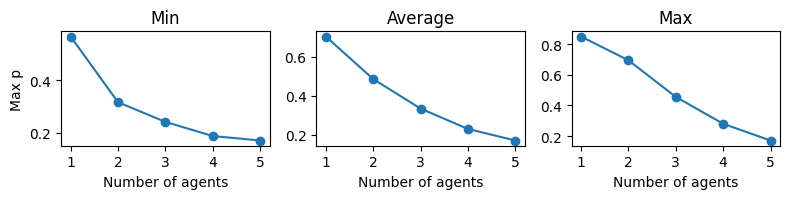

In [113]:
# create 3 subplots for min_ps, avg_ps and max_ps
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.1))

# add grid to the subplots
# for i in range(3):
#     ax[i].grid(True)

# plot min_ps vs k
ax[0].plot(range(1, n+1), min_ps, marker='o')
ax[0].set_title('Min')
ax[0].set_xlabel('Number of agents')
ax[0].set_ylabel('Max p')

# plot avg_ps vs k
ax[1].plot(range(1, n+1), avg_ps, marker='o')
ax[1].set_title('Average')
ax[1].set_xlabel('Number of agents')
# ax[1].set_ylabel('Max p')

# plot max_ps vs k
ax[2].plot(range(1, n+1), max_ps, marker='o')
ax[2].set_title('Max')
ax[2].set_xlabel('Number of agents')
# ax[2].set_ylabel('Max p')

plt.tight_layout()

# plt.savefig('../results/prob_values/german_credit_max_p.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('../results/prob_values/propublica_max_p.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('../results/prob_values/folktables_max_p.pdf', dpi=300, bbox_inches='tight')

In [111]:
# create a dataframe to store the min, avg and max values
df = pd.DataFrame({'Min': min_ps, 'Average': avg_ps, 'Max': max_ps, 'k': range(1, n+1)})


In [112]:
# df.to_csv('../results/prob_values/german_credit_max_p.csv', index=False)
# df.to_csv('../results/prob_values/propublica_max_p.csv', index=False)
df.to_csv('../results/prob_values/folktables_max_p.csv', index=False)
